In [1]:
! hostname

c01


In [2]:
# enable autoreload
%load_ext autoreload
%autoreload 2

In [3]:
import os
import time
import sys
import random
import scanpy as sc
import numpy as np
import pandas as pd
import torch
from anndata import AnnData
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad

from sklearn import metrics
import multiprocessing as mp
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import scipy.sparse as sp
import scipy.linalg

import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams['pdf.fonttype'] = 42
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=300,
                     dpi_save=1200,
#                      facecolor='w',
#                      frameon=False, # frameon=True
#                      figsize=(4,4)
                    ) 
%config InlineBackend.figure_format='retina'
%matplotlib inline

scanpy==1.10.3 anndata==0.10.9 umap==0.5.9.post2 numpy==1.26.4 scipy==1.13.1 pandas==2.3.1 scikit-learn==1.6.1 statsmodels==0.14.5 pynndescent==0.5.13


In [5]:
# import cellniche as cn

sys.path.append('/share/home/liangzhongming/phd_code/530/CellNiche/release')
import cellniche as cn

In [7]:
# TO MATCH PAPER FIGURES
adata = sc.read_h5ad("/share/home/liangzhongming/phd_code/530/CellNiche/data/mergedBrain_4slices_CellNiche.h5ad")

In [8]:
adata

AnnData object with n_obs × n_vars = 276321 × 2815
    obs: 'x', 'y', 'z', 'Main_molecular_cell_type', 'Sub_molecular_cell_type', 'Main_molecular_tissue_region', 'Sub_molecular_tissue_region', 'Molecular_spatial_cell_type', 'leiden', 'cell_id', 'class_label', 'class', 'class_bootstrapping_probability', 'subclass_label', 'subclass', 'subclass_bootstrapping_probability', 'supertype_label', 'supertype', 'supertype_bootstrapping_probability', 'cluster_label', 'cluster', 'cluster_alias', 'cluster_bootstrapping_probability', 'brain_section_label_obs', 'brain_section_label_meta', 'average_correlation_score', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'neurotransmitter', 'subclass_confidence_score', 'cluster_confidence_score', 'high_quality_transfer', 'ccf_x', 'ccf_y', 'ccf_z', 'parcellation_index', 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'sample'
    uns: 'spatial_fov', 'spatial_neighbors'
    obsm: 'CellNiche', 'X_umap', 'spatial', 'spatial_fov'
    ob

In [10]:
emb = adata.obsm["CellNiche"].astype(np.float32)
batch = adata.obs["sample"].values
cell_type = adata.obs["supertype"].values

### 1. Entropy of Batch Mixing

In [11]:
entropy_score = cn.compute_entropy_batch_mixing(
    embeddings=emb,
    batch_labels=batch,
    k=50, 
    normalize=True
)
print("Entropy of batch mixing:", entropy_score)

Entropy of batch mixing: 0.40571743385945375


### 2. iLISI

In [12]:
ilisi_vec = cn.compute_ilisi(
    embeddings=emb,
    batch_labels=batch,
    k=50 
)
print("Mean iLISI:", ilisi_vec.mean())

Mean iLISI: 0.3174829998443839


### 3. Seurat Alignment Score (SAS)

In [13]:
sas_score = cn.compute_seurat_alignment_score(
    embeddings=emb,
    batch_labels=batch,
    neighbor_frac=0.001,
    n_repeats=3,
    random_state=42
)
print("Seurat Alignment Score:", sas_score)

Seurat Alignment Score: 0.6094580073351136


### 4. ASW‑batch

In [14]:
asw_batch = cn.compute_avg_silhouette_width_batch(
    embeddings=emb,
    batch_labels=batch,
    cell_types=cell_type,
    min_cells=3
)
print("ASW‑batch:", asw_batch)

ASW‑batch: 0.7035169437197648


### Visualization

In [34]:
sc.pp.neighbors(
    adata, 
    n_neighbors=50,
    use_rep='CellNiche'
)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:03:30)


In [35]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:16:56)


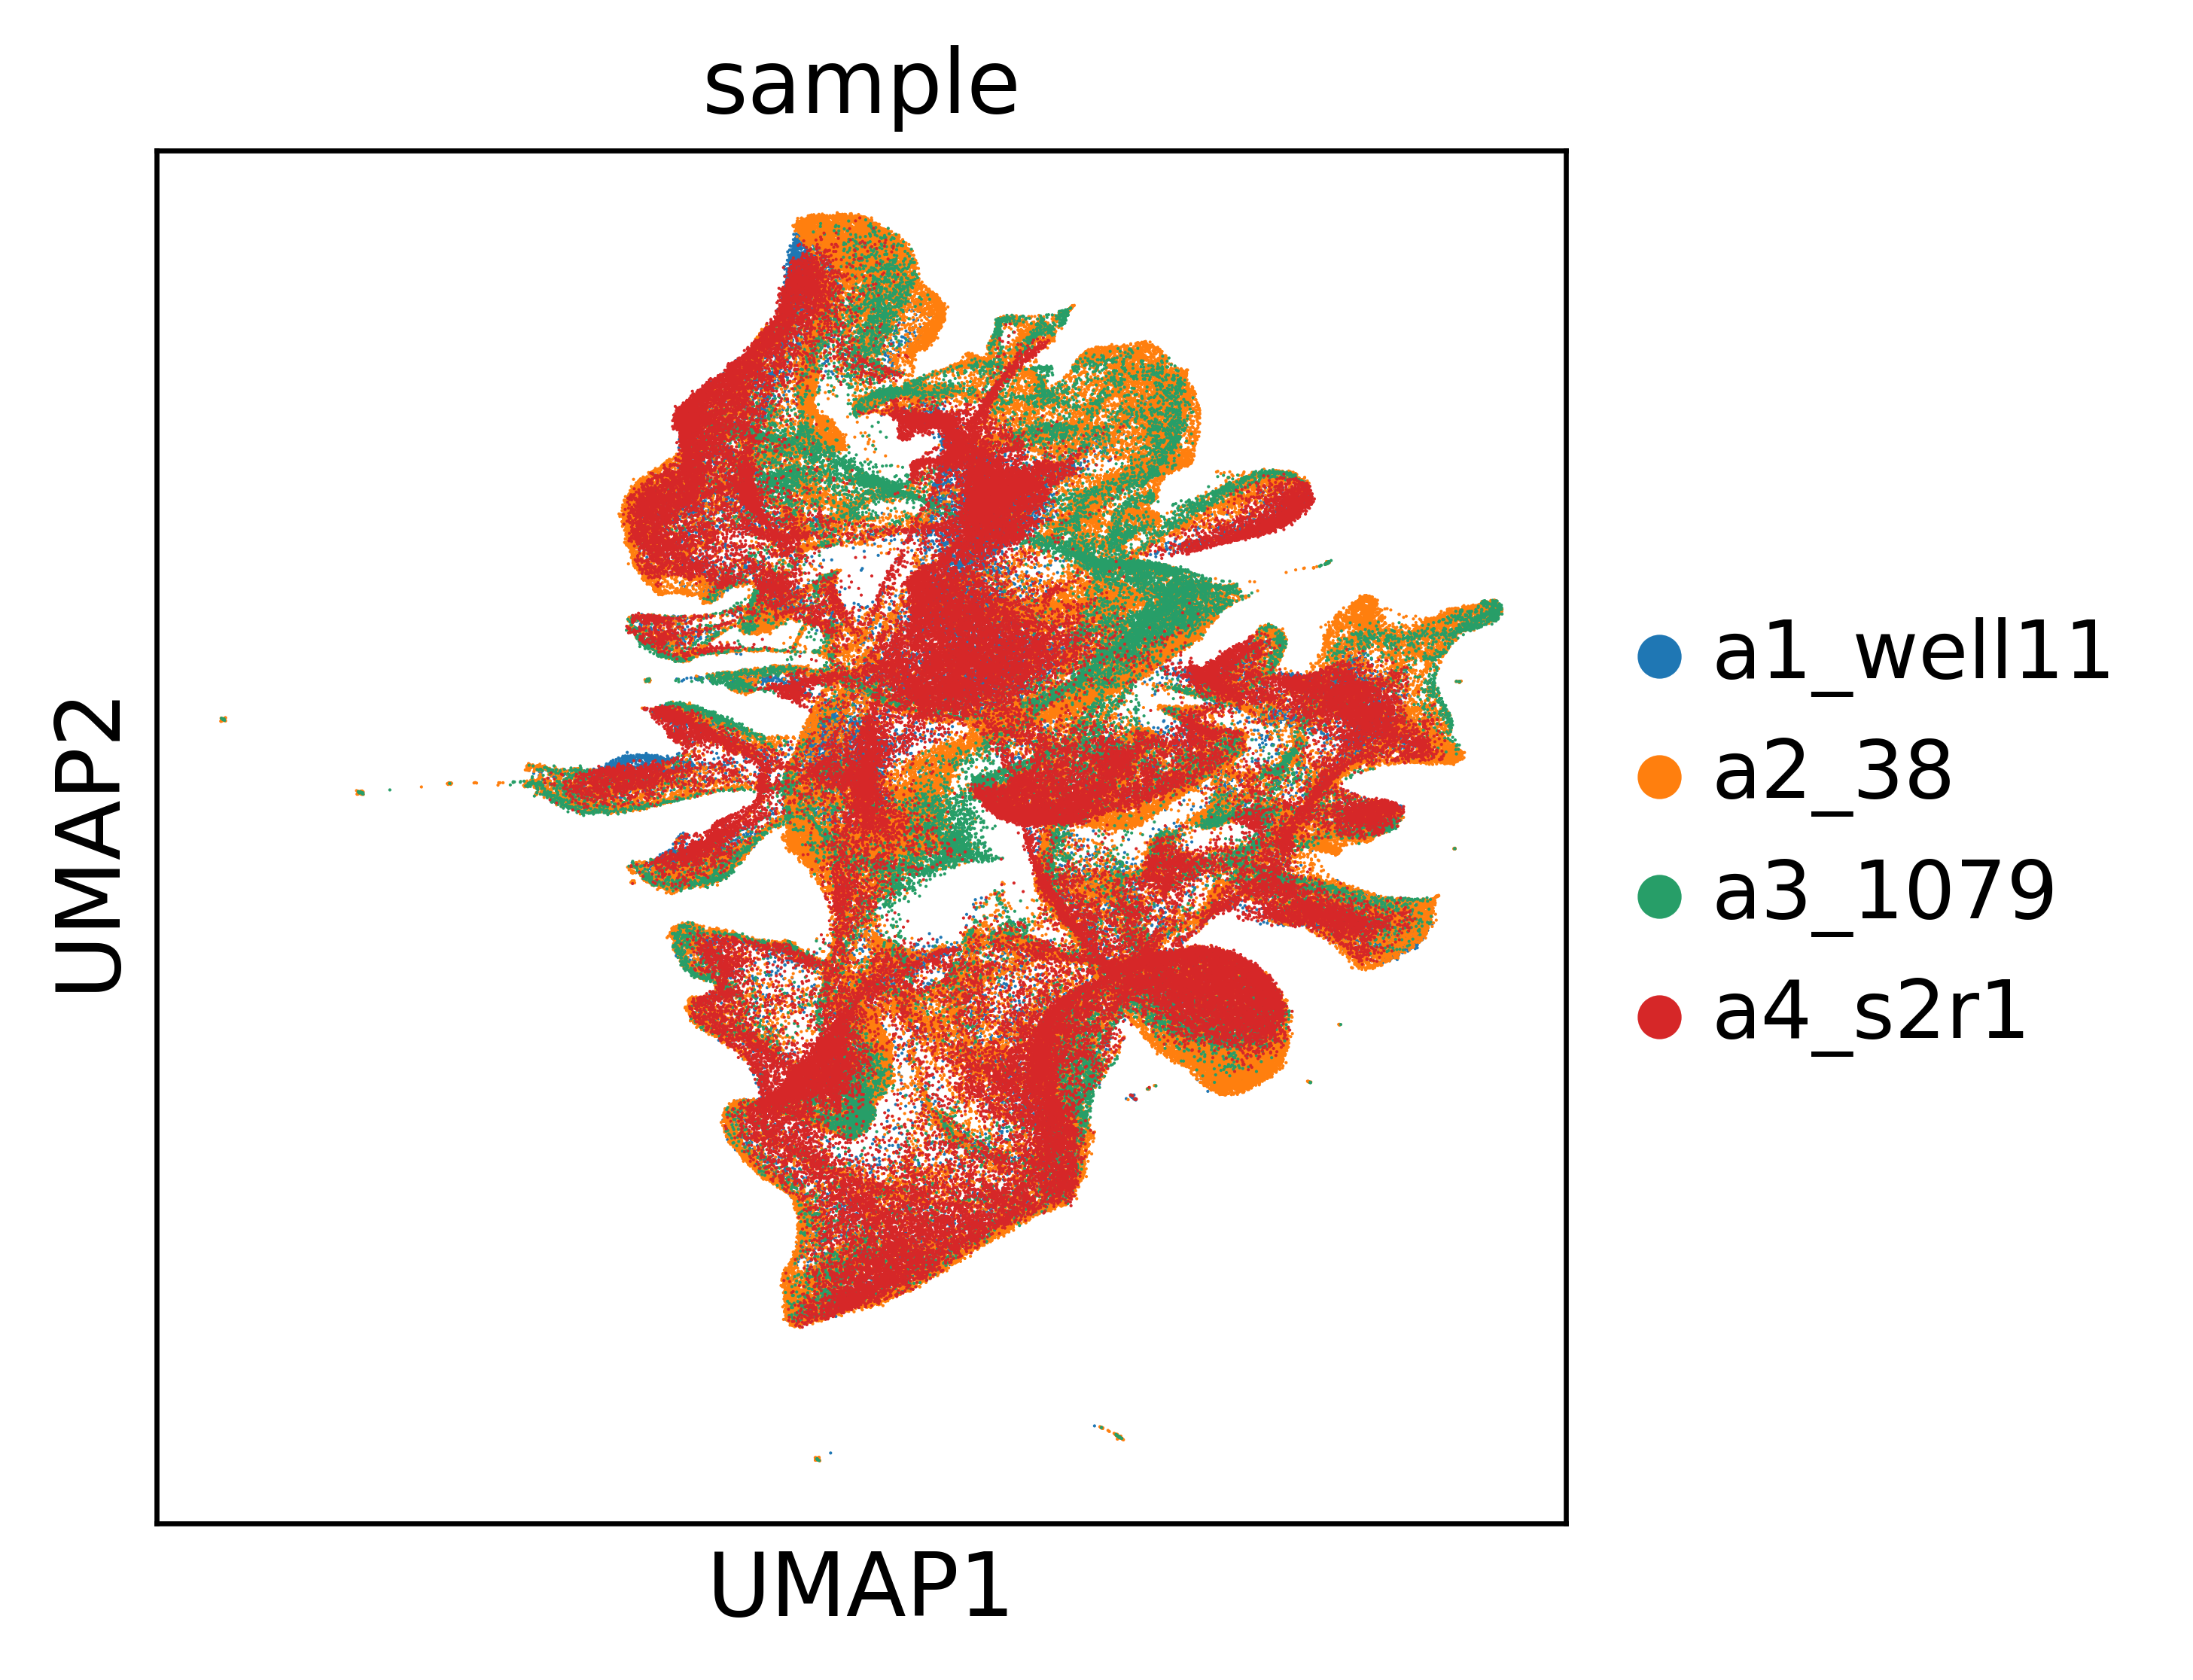

In [36]:
sc.pl.umap(
    adata,
    color='sample',
    size=1, 
)

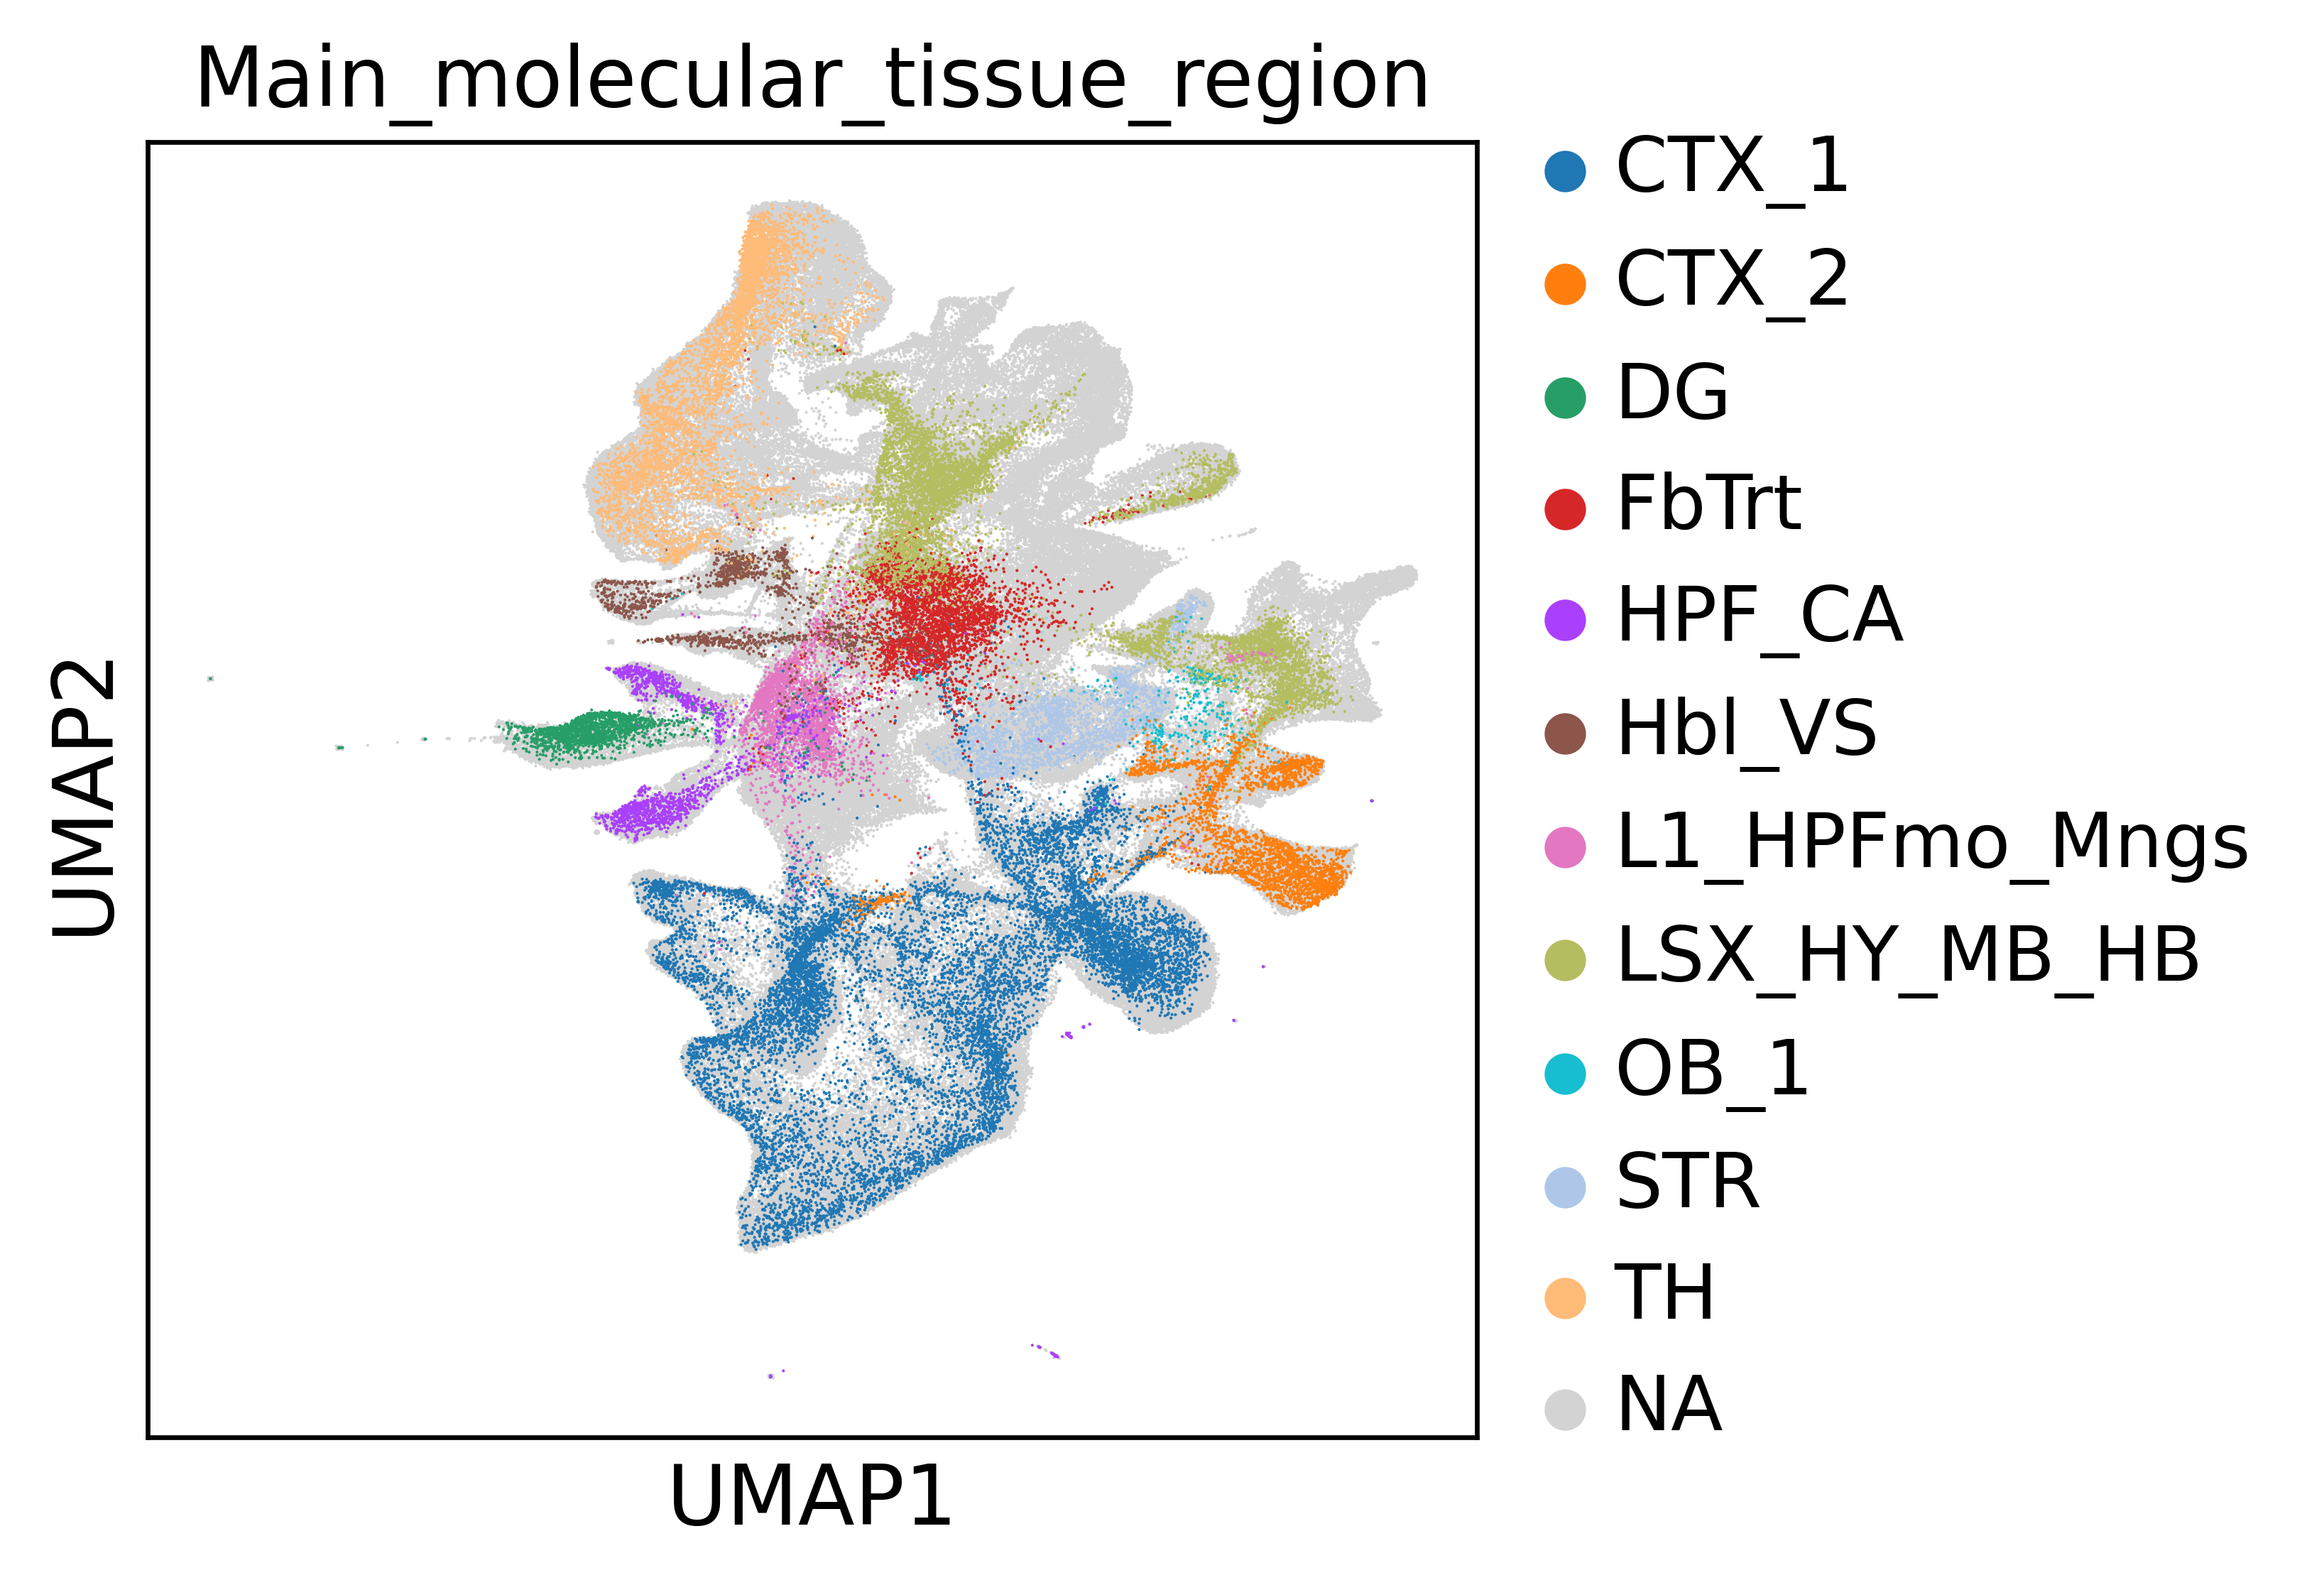

In [38]:
sc.pl.umap(
    adata,
    color='Main_molecular_tissue_region',
    size=1, 
)

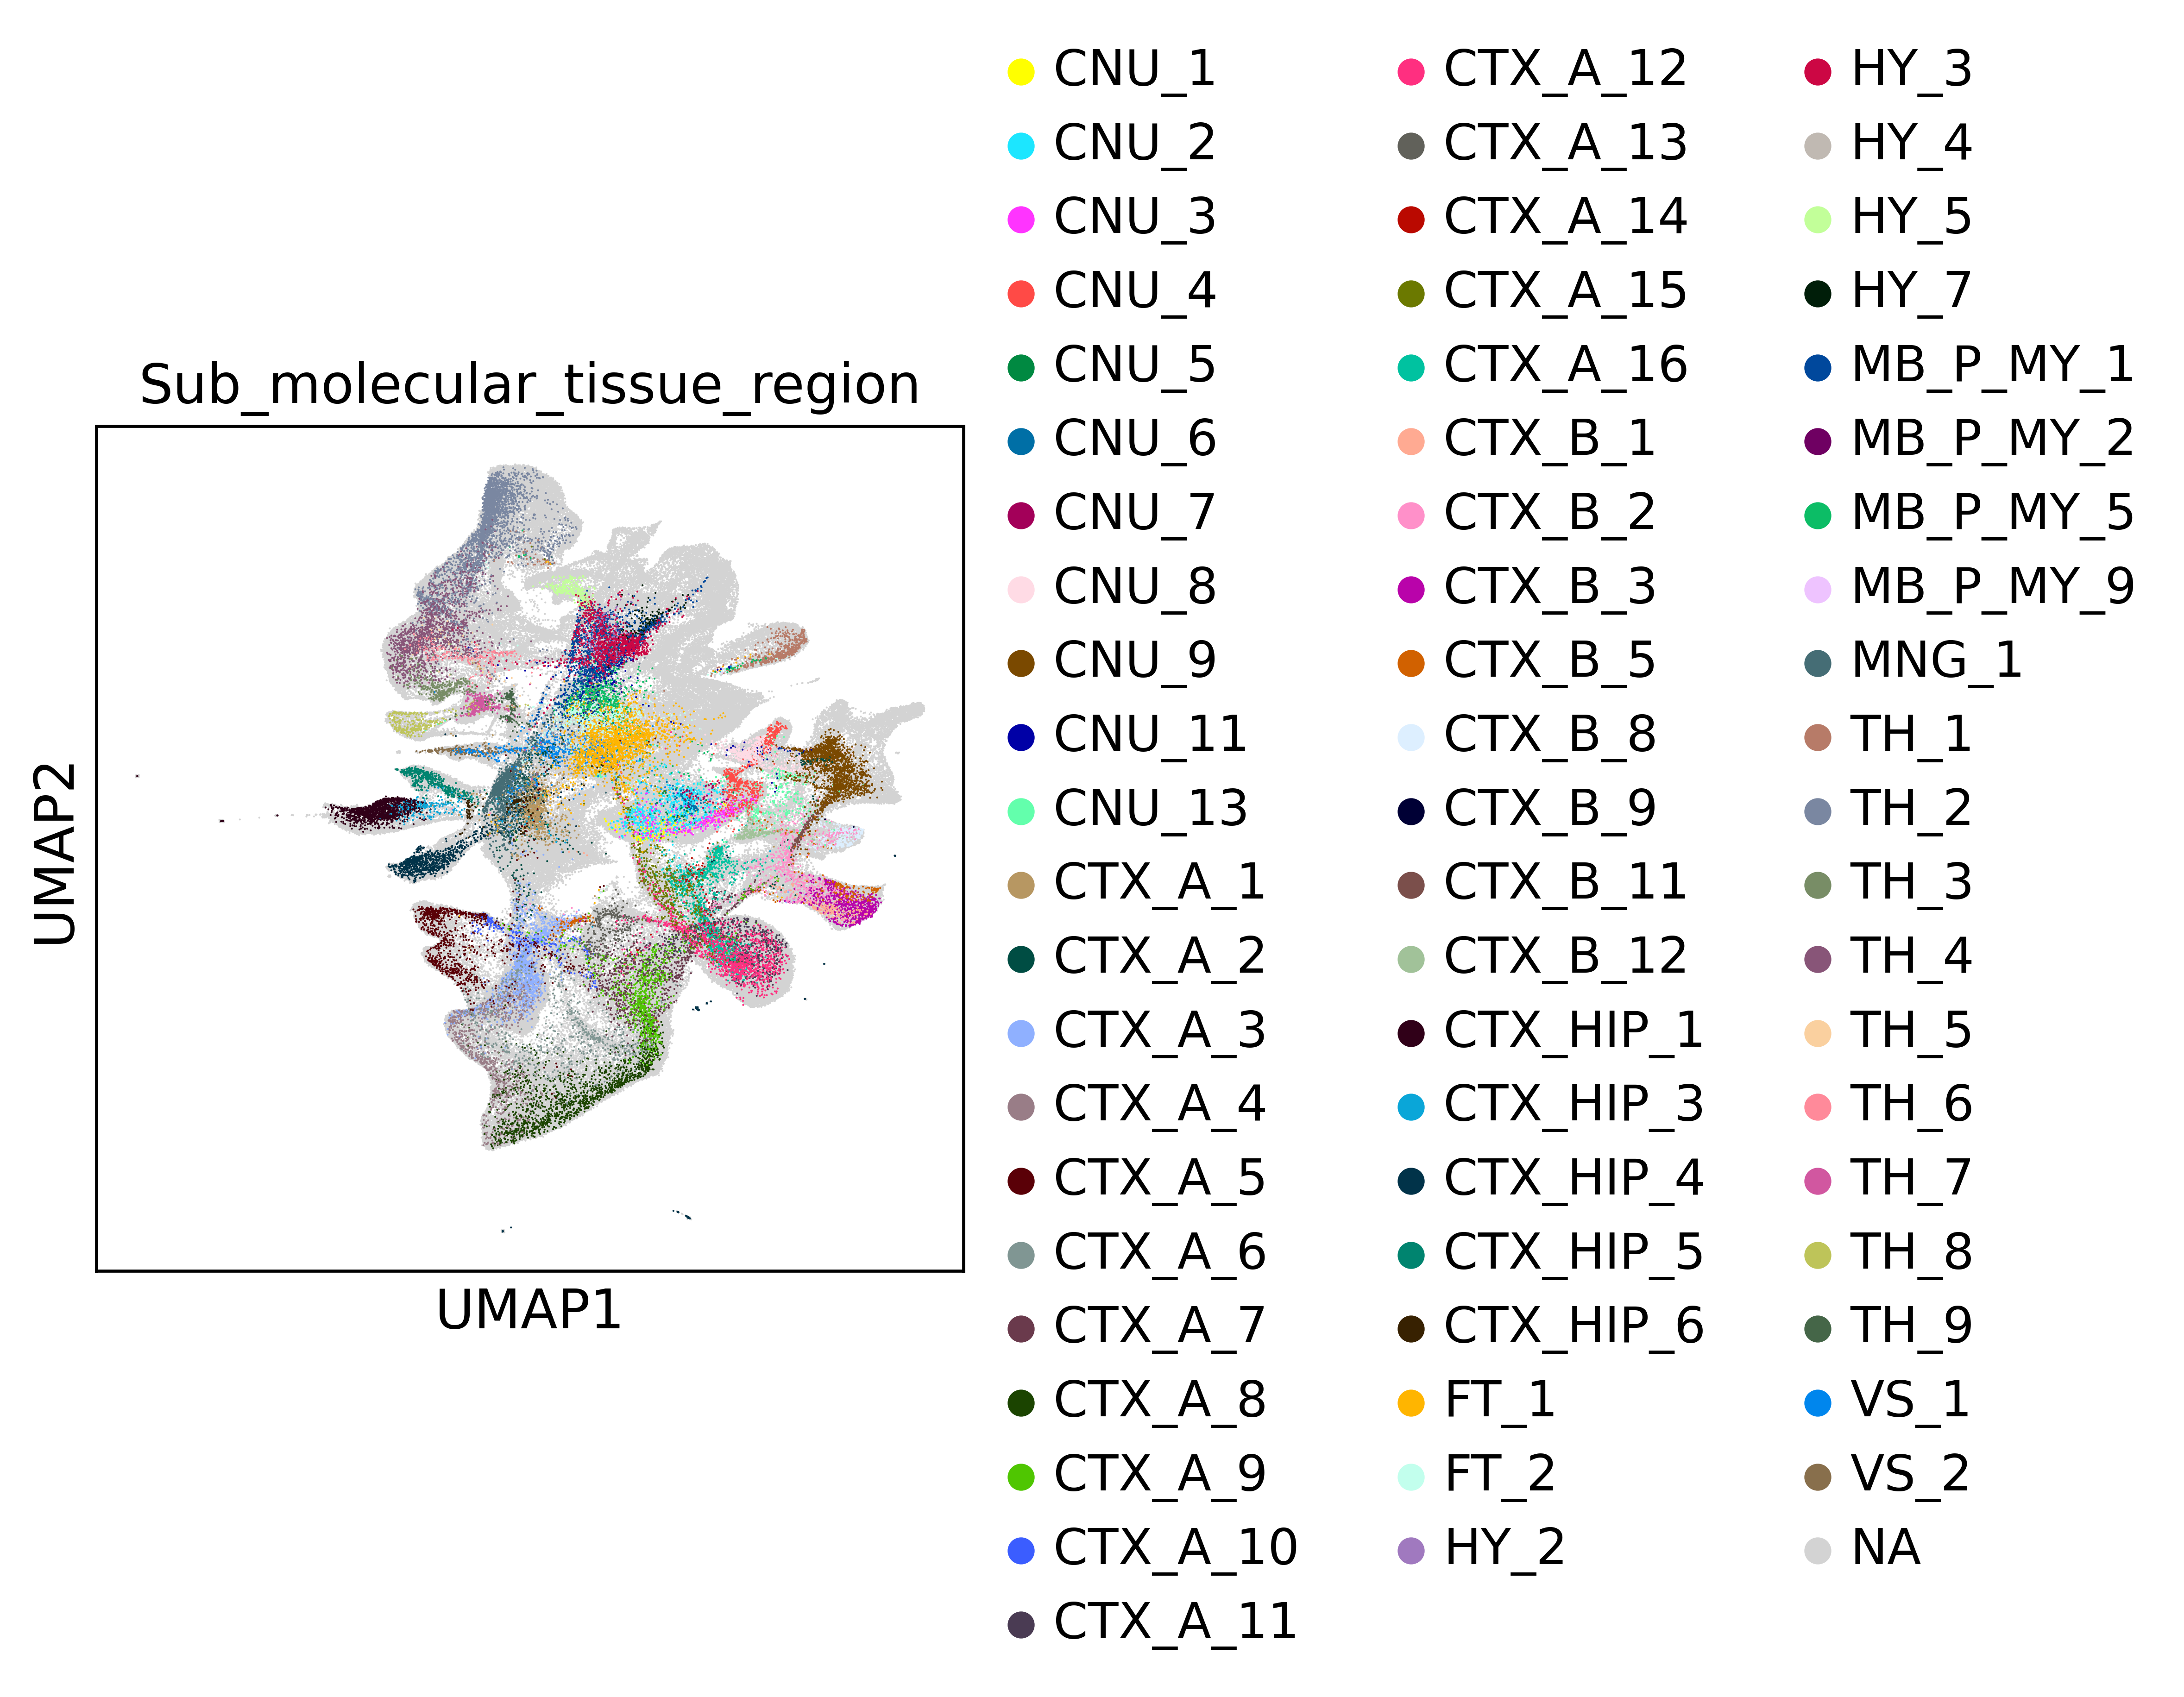

In [44]:
sc.pl.umap(
    adata,
    color='Sub_molecular_tissue_region',
    size=1, 
)